
**OBJECTIVE**

The main aim of this project is to analyze the dataset and build the model to predict the minimum and maximum salary.

**DATASET LINK**

https://drive.google.com/file/d/1TupHedFTNQ_1PRe-EGxqE4S_cV4N1UyX/view?usp=sharing

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker


**LOAD THE DATASET**

In [2]:
data = pd.read_csv('/content/Data_Science_Jobs_in_India.csv')
data.head()

,Unnamed: 0,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,0,TCS,Data Scientist,2,7.8L,4.5L,16.0L,841
1,1,Accenture,Data Scientist,2,12.8L,5.8L,23.0L,501
2,2,IBM,Data Scientist,2,13.4L,5.3L,25.0L,394
3,3,Cognizant,Data Scientist,2,9.8L,5.0L,18.0L,318
4,4,Capgemini,Data Scientist,2,8.6L,4.8L,14.6L,300


**TO UNDERSTAND THE DATASET**

**info():** Gives a summary of the DataFrame structure (data types, non-null counts, memory usage).

**describe()**: Provides statistics for numerical columns (mean, min, max, quartiles).


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1602 non-null   int64 
 1   company_name     1602 non-null   object
 2   job_title        1602 non-null   object
 3   min_experience   1602 non-null   int64 
 4   avg_salary       1602 non-null   object
 5   min_salary       1602 non-null   object
 6   max_salary       1602 non-null   object
 7   num_of_salaries  1602 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 100.2+ KB


In [4]:
data.describe()

,Unnamed: 0,min_experience,num_of_salaries
count,1602.000000,1602.000000,1602.000000
mean,800.500000,2.799001,58.055556
std,462.601881,2.353686,169.042138
min,0.000000,0.000000,3.000000
25%,400.250000,1.000000,9.250000
50%,800.500000,2.000000,22.000000
75%,1200.750000,4.000000,47.000000
max,1601.000000,21.000000,4200.000000


**DATA PREPROCESSING**

In [5]:
# Convert salary columns from strings to floats
for col in ['avg_salary', 'min_salary', 'max_salary']:
    data[col] = data[col].str.replace('L', '').astype(float)* 100000

In [6]:
# Encode job title
label_encoder = LabelEncoder()
data['job_title_encoded'] = label_encoder.fit_transform(data['job_title'])

In [7]:
# Define features (X) and target (y) variables
X = data[['min_experience', 'job_title_encoded']]
y_min_salary = data['min_salary']
y_max_salary = data['max_salary']

In [8]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**DATA VISUALIZATION**

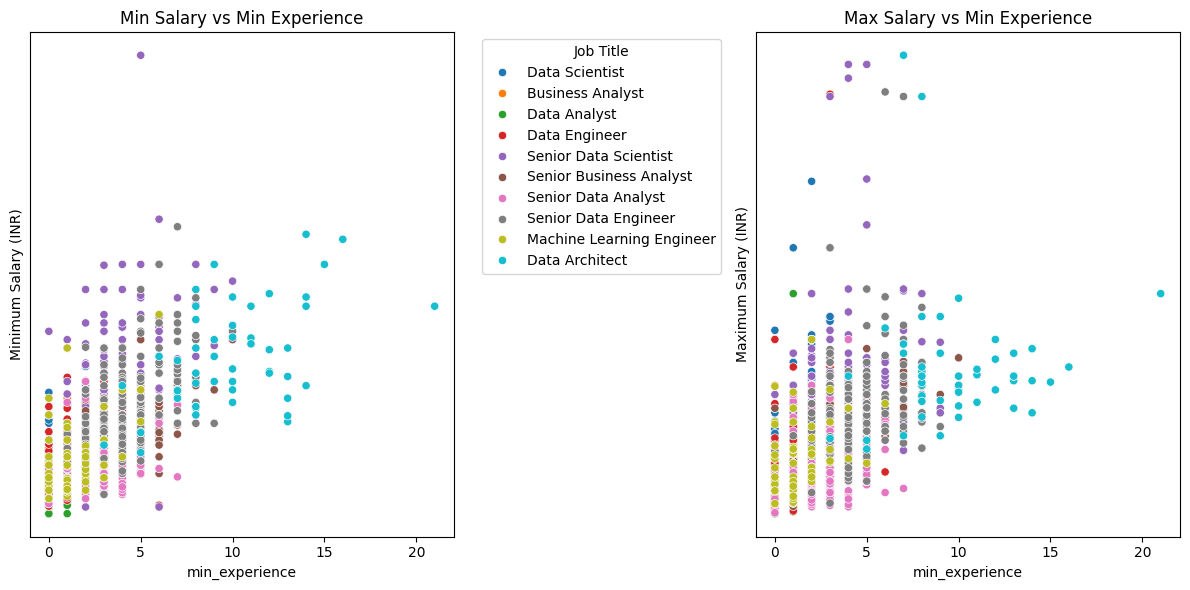

In [9]:
# Scatter plot to check linearity between min_experience and salary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='min_experience', y='min_salary', hue='job_title', data=data)
plt.title('Min Salary vs Min Experience')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))  # Limit the number of ticks on y-axis
plt.ylabel('Minimum Salary (INR)')  # Clear y-axis label
plt.gca().set_yticks([])
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
sns.scatterplot(x='min_experience', y='max_salary', hue='job_title', data=data, legend=False)
plt.title('Max Salary vs Min Experience')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))  # Limit the number of ticks on y-axis
plt.ylabel('Maximum Salary (INR)')
plt.gca().set_yticks([])  # Remove y-tick values

plt.tight_layout()
plt.show()

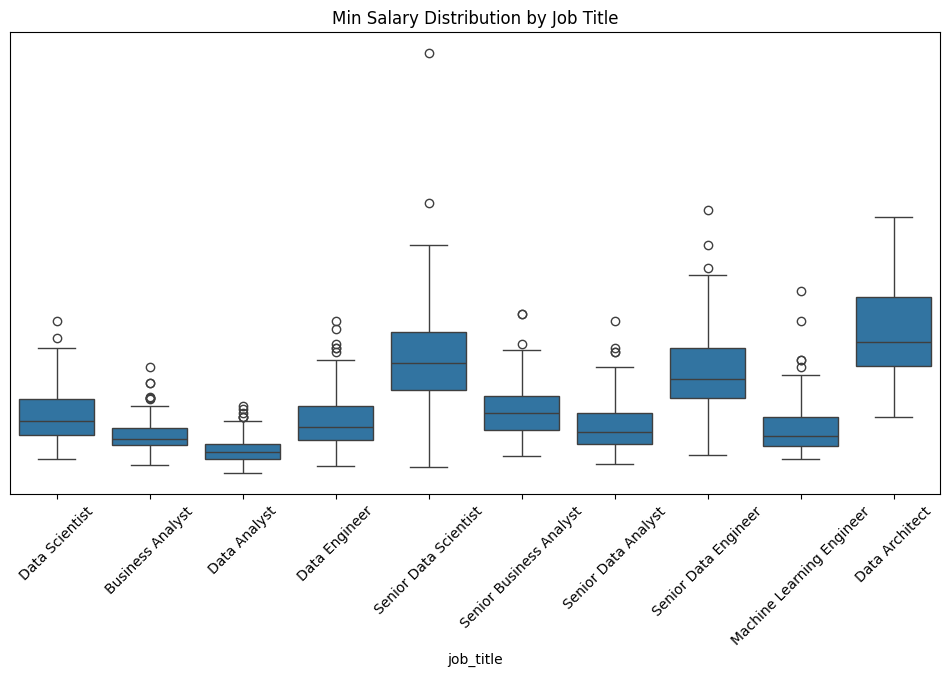

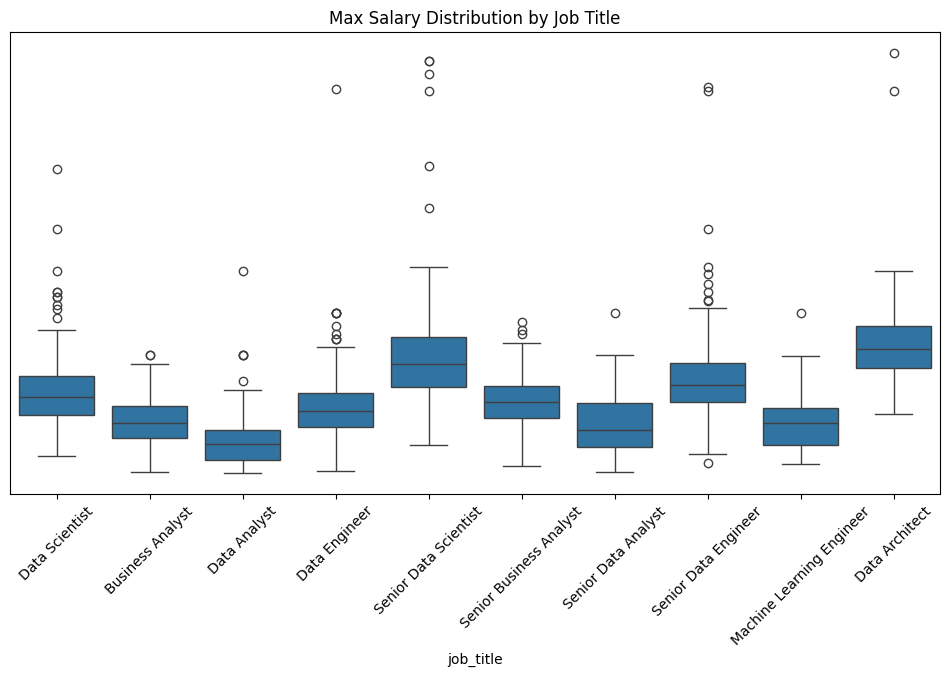

In [10]:
# Box plot for Minimum Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_title', y='min_salary', data=data)
plt.title('Min Salary Distribution by Job Title')
plt.gca().set_yticks([])  # Remove y-tick values
plt.ylabel('')  # Optionally remove the y-axis label
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

# Box plot for Maximum Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_title', y='max_salary', data=data)
plt.title('Max Salary Distribution by Job Title')
plt.gca().set_yticks([])  # Remove y-tick values
plt.ylabel('')  # Optionally remove the y-axis label
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

**RANDOM FOREST REGRESSOR**

In [11]:
# Split data for both min_salary and max_salary predictions
X_train, X_test, y_min_train, y_min_test = train_test_split(X, y_min_salary, test_size=0.2, random_state=42)
_, _, y_max_train, y_max_test = train_test_split(X, y_max_salary, test_size=0.2, random_state=42)

# Initialize the models
min_salary_model = RandomForestRegressor(random_state=42)
max_salary_model = RandomForestRegressor(random_state=42)

# Train the models
min_salary_model.fit(X_train, y_min_train)
max_salary_model.fit(X_train, y_max_train)

RandomForestRegressor(random_state=42)

In [12]:
# Random Forest Evaluation
# Assuming `min_salary_model` and `max_salary_model` are your random forest models and `X_test` is the test set
min_salary_rf_pred = min_salary_model.predict(X_test)
max_salary_rf_pred = max_salary_model.predict(X_test)

# Calculate MAE, MSE, and R² for Random Forest
mae_min_rf = mean_absolute_error(y_min_test, min_salary_rf_pred)
mse_min_rf = mean_squared_error(y_min_test, min_salary_rf_pred)
r2_min_rf = r2_score(y_min_test, min_salary_rf_pred)

mae_max_rf = mean_absolute_error(y_max_test, max_salary_rf_pred)
mse_max_rf = mean_squared_error(y_max_test, max_salary_rf_pred)
r2_max_rf = r2_score(y_max_test, max_salary_rf_pred)

print(f"Random Forest - Minimum Salary Prediction: MAE = {mae_min_rf}, MSE = {mse_min_rf}, R² = {r2_min_rf}")
print(f"Random Forest - Maximum Salary Prediction: MAE = {mae_max_rf}, MSE = {mse_max_rf}, R² = {r2_max_rf}")

Random Forest - Minimum Salary Prediction: MAE = 268223.2883094393, MSE = 139665985014.78442, R² = 0.5801724323372686
Random Forest - Maximum Salary Prediction: MAE = 556564.4607028734, MSE = 824674443533.382, R² = 0.38519039350364503


In [13]:
# Create and fit the LabelEncoder
label_encoder_job = LabelEncoder()
label_encoder_job.fit(data['job_title'])

# Example new input data
new_data = pd.DataFrame({
    'min_experience': [6],
    'job_title_encoded': [label_encoder_job.transform(['Data Scientist'])[0]]  # Transform job title
})

# Predict min and max salary for new data
new_min_salary_pred = min_salary_model.predict(new_data)
new_max_salary_pred = max_salary_model.predict(new_data)

print(f"Predicted Minimum Salary: {new_min_salary_pred[0]} L")
print(f"Predicted Maximum Salary: {new_max_salary_pred[0]} L")


Predicted Minimum Salary: 1039317.1273772668 L
Predicted Maximum Salary: 2231040.196078432 L


Due to the non-linearity in the data distribution, the Random Forest model struggled to make accurate predictions for minimum experience levels above 6 or 7 years. Therefore, I am using a simple sequential neural network model to address this issue.

**NEURAL NETWORK MODEL**

In [14]:
import joblib

# Save the label encoder and scaler
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Split data for both min_salary and max_salary predictions
X_train, X_test, y_min_train, y_min_test = train_test_split(X_scaled, y_min_salary, test_size=0.2, random_state=42)
_, _, y_max_train, y_max_test = train_test_split(X_scaled, y_max_salary, test_size=0.2, random_state=42)

In [15]:
# Build the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  # Output layer for salary prediction
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Create two models: one for min_salary and one for max_salary
min_salary_model = create_model()
max_salary_model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**TRAINING THE MODEL**

In [16]:
# Train the model for min_salary
min_salary_model.fit(X_train, y_min_train, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

# Train the model for max_salary
max_salary_model.fit(X_train, y_max_train, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1052323217408.0000 - val_loss: 1244729049088.0000
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1101684801536.0000 - val_loss: 1243460796416.0000
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1091240198144.0000 - val_loss: 1236754628608.0000
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1072099885056.0000 - val_loss: 1216633765888.0000
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 986403438592.0000 - val_loss: 1173553414144.0000
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 994607693824.0000 - val_loss: 1098948476928.0000
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 922024214528.0000 - val_loss: 988149514240.0000
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 820381941760.0000 - val_loss: 849666113536.0000
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 647429816320.0000 - val_loss: 692290781184.0000
Epoch 10/

In [17]:
# Neural Network Evaluation
# Assuming `min_salary_model` and `max_salary_model` for the neural network are separate models
min_salary_nn_pred = min_salary_model.predict(X_test).flatten()  # Flattening if predictions are in 2D
max_salary_nn_pred = max_salary_model.predict(X_test).flatten()

# Calculate MAE, MSE, and R² for Neural Network
mae_min_nn = mean_absolute_error(y_min_test, min_salary_nn_pred)
mse_min_nn = mean_squared_error(y_min_test, min_salary_nn_pred)
r2_min_nn = r2_score(y_min_test, min_salary_nn_pred)

mae_max_nn = mean_absolute_error(y_max_test, max_salary_nn_pred)
mse_max_nn = mean_squared_error(y_max_test, max_salary_nn_pred)
r2_max_nn = r2_score(y_max_test, max_salary_nn_pred)

print(f"Neural Network - Minimum Salary Prediction: MAE = {mae_min_nn}, MSE = {mse_min_nn}, R² = {r2_min_nn}")
print(f"Neural Network - Maximum Salary Prediction: MAE = {mae_max_nn}, MSE = {mse_max_nn}, R² = {r2_max_nn}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Neural Network - Minimum Salary Prediction: MAE = 300290.13454049843, MSE = 168789788004.28668, R² = 0.4926280286739355
Neural Network - Maximum Salary Prediction: MAE = 645353.1779595015, MSE = 1006010512217.1584, R² = 0.2500010980122106


In [18]:
# Example new input data
new_data = pd.DataFrame({
    'min_experience': [10],
    'job_title_encoded': [label_encoder.transform(['Data Scientist'])[0]]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict min and max salary for new data
new_min_salary_pred = min_salary_model.predict(new_data_scaled)
new_max_salary_pred = max_salary_model.predict(new_data_scaled)

print(f"Predicted Minimum Salary: {new_min_salary_pred[0][0]} L")
print(f"Predicted Maximum Salary: {new_max_salary_pred[0][0]} L")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Minimum Salary: 1783414.75 L
Predicted Maximum Salary: 3103555.5 L


**SAVING THE MODEL**

In [19]:
# Save the min_salary and max_salary models as .h5 files
min_salary_model.save('min_salary_model.h5')
max_salary_model.save('max_salary_model.h5')

**PYTHON CODE FOR WEB APP USING STREAMLIT**

In [20]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.2 MB/s eta 0:00:00


In [21]:
pip install streamlit-option-menu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 8.9 MB/s eta 0:00:00


In [22]:
%%writefile app.py
import streamlit as st
import pandas as pd
from joblib import load
from tensorflow.keras.models import load_model
from streamlit_option_menu import option_menu
import time  # Import time for simulating loading duration

# Load saved models
min_salary_model = load_model('min_salary_model.h5')
max_salary_model = load_model('max_salary_model.h5')

# Load the label encoder and scaler used during model training
label_encoder = load('label_encoder.pkl')
scaler = load('scaler.pkl')

# Function to set page background color
def set_background_color(color):
    st.markdown(
        f"""
        <style>
        .reportview-container {{
            background-color: {color};
        }}
        </style>
        """,
        unsafe_allow_html=True
    )

# Set the page configuration
st.set_page_config(
    page_title="Salary Prediction",
    page_icon="📊",
    layout="wide"
)

# Set the background color for the entire app (default)
set_background_color("#f0f2f5")  # Light grey background

# Sidebar for navigation
with st.sidebar:
    st.title("Prediction App")
    page = option_menu(
        menu_title=None,
        options=["Home", "About", "Salary Prediction"],
        icons=["house", "info-circle", "graph-up-arrow"],
        menu_icon="cast",
        default_index=0,
        styles={
            "container": {"padding": "0!important", "background-color": 'transparent'},
            "icon": {"color": "black", "font-size": "18px"},
            "nav-link": {"color": "black", "font-size": "16px", "text-align": "left", "margin": "0px", "margin-bottom": "15px"},
            "nav-link-selected": {"background-color": "#7B06A6", "font-size": "15px"},
        }
    )
    st.write("***")

if page == "Home":
    st.title("Welcome to the Salary Prediction App")
    st.write("This app predicts the minimum and maximum salary based on job title and minimum years of experience.")
    st.write("Navigate to the About page to learn more or to the Salary Prediction page to make predictions.")

elif page == "About":
    st.title("About This App")
    st.write("""\
        The Salary Prediction App is designed to provide minimum and maximum salary based on the following parameters:
        - Job Title: The title of the job position.
        - Minimum Years of Experience: The minimum years of relevant work experience ranges from 1 to 10.

        This app uses a machine learning model trained on historical salary data to make predictions.
    """)

elif page == "Salary Prediction":
    st.title('Salary Prediction')

    # Input fields for user with default 'Select' and experience as 0
    job_title = st.selectbox('Job Title', [
        'Select', 'Data Scientist', 'Business Analyst', 'Data Analyst',
        'Data Engineer', 'Senior Data Scientist',
        'Senior Business Analyst', 'Senior Data Analyst',
        'Senior Data Engineer', 'Machine Learning Engineer',
        'Data Architect'
    ], index=0)  # Default index set to 'Select'

    # Limiting the experience input to a range of 1 to 10, with default value 0
    min_experience = st.number_input('Minimum Years of Experience', min_value=0, max_value=10, step=1, value=0)  # Default value set to 0

    # Prepare the input data for prediction only if conditions are met
    if job_title != 'Select' and min_experience > 0:
        job_title_encoded = label_encoder.transform([job_title])[0]
        input_data = pd.DataFrame([[min_experience, job_title_encoded]], columns=['min_experience', 'job_title_encoded'])
        input_data_scaled = scaler.transform(input_data)

        st.markdown(
            """
            <style>
            div.stButton > button {
                background-color: #7B06A6;  /* Purple background */
                color: white;  /* White text */
                border-radius: 8px;
                padding: 10px;
                font-size: 16px;
            }
            div.stButton > button:hover {
                background-color: #7B06A6 !important; /* Purple background on hover (no change) */
                color: white !important;
                border: none !important;
            }
            div.stButton > button:focus {
                background-color: #7B06A6 !important;  /* Maintain purple on focus */
                color: white !important;
                border: none !important;
            }
            </style>
            """,
            unsafe_allow_html=True
        )

        # Make predictions
        if st.button('Predict Salary'):
            # Display loading image
            loading_image = st.image("Spinner-3.gif", use_column_width=False, width=50)  # Adjust width to 100 pixels

            # Simulating a delay for loading (remove this in production)
            time.sleep(2)  # Simulating delay for demonstration purposes

            # Predictions
            min_salary_pred = min_salary_model.predict(input_data_scaled)[0][0]
            max_salary_pred = max_salary_model.predict(input_data_scaled)[0][0]

            # Remove loading image
            loading_image.empty()

            # Display the predicted salary range in two columns
            col1, col2 = st.columns(2)

            with col1:
                st.image("minimum_img.png", use_column_width=False, width=70)
                st.markdown(f"### Predicted Minimum Annual Salary")
                st.write(f'**₹{min_salary_pred:,.2f} INR**')

            with col2:
                st.image("maximum_image.png", use_column_width=False, width=70)
                st.markdown(f"### Predicted Maximum Annual Salary")
                st.write(f'**₹{max_salary_pred:,.2f} INR**')




Writing app.py
